#Sentiment Analysis of Crypto News

In [ ]:
#imort essential modules
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
# Github reference Link for pygooglenews module: https://github.com/kotartemiy/pygooglenews

#!pip install pygooglenews

In [ ]:
#Get news articles from Google News

#import Google News module
from pygooglenews import GoogleNews

gn = GoogleNews()

In [ ]:
#Top Stories
top = gn.top_news()

#Getting Stories by Topic
# search for the best matching articles that mention bitcoin
search = gn.search('Bitcoin')

In [ ]:
search

{'entries': [{'guidislink': False,
   'id': 'CBMiZWh0dHBzOi8vd3d3LmJhaS5vcmcvYmFua2luZy1zdHJhdGVnaWVzL2FydGljbGUtZGV0YWlsL2NyeXB0b2N1cnJlbmN5LXJlZ3VsYXRpb25zLWFuZC1iYW5raW5nLWluLTIwMjIv0gEA',
   'link': 'https://www.bai.org/banking-strategies/article-detail/cryptocurrency-regulations-and-banking-in-2022/',
   'links': [{'href': 'https://www.bai.org/banking-strategies/article-detail/cryptocurrency-regulations-and-banking-in-2022/',
     'rel': 'alternate',
     'type': 'text/html'}],
   'published': 'Mon, 13 Dec 2021 14:31:41 GMT',
   'published_parsed': time.struct_time(tm_year=2021, tm_mon=12, tm_mday=13, tm_hour=14, tm_min=31, tm_sec=41, tm_wday=0, tm_yday=347, tm_isdst=0),
   'source': {'href': 'https://www.bai.org',
    'title': 'BAI Banking Strategies'},
   'sub_articles': [],
   'summary': '<a href="https://www.bai.org/banking-strategies/article-detail/cryptocurrency-regulations-and-banking-in-2022/" target="_blank">Cryptocurrency regulations and banking in 2022</a>&nbsp;&nbsp;<f

In [ ]:
#Method 2
#!pip install requests
#!pip install requests_html
from requests_html import HTMLSession

In [ ]:
url = 'https://news.google.com/rss/search?q=cryptocurrency&hl=en-US&gl=US&ceid=US%3Aen'

In [ ]:
s = HTMLSession()
r = s.get(url)
print(r.html.html)

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><rss version="2.0" xmlns:media="http://search.yahoo.com/mrss/"><channel><generator>NFE/5.0</generator><title>"cryptocurrency" - Google News</title><link>https://news.google.com/search?q=cryptocurrency&amp;hl=en-US&amp;gl=US&amp;ceid=US:en</link><language>en-US</language><webMaster>news-webmaster@google.com</webMaster><copyright>2021 Google Inc.</copyright><lastBuildDate>Tue, 14 Dec 2021 01:33:43 GMT</lastBuildDate><description>Google News</description><item><title>Cryptocurrency regulations and banking in 2022 - BAI Banking Strategies</title><link>https://www.bai.org/banking-strategies/article-detail/cryptocurrency-regulations-and-banking-in-2022/</link><guid isPermaLink="false">CBMiZWh0dHBzOi8vd3d3LmJhaS5vcmcvYmFua2luZy1zdHJhdGVnaWVzL2FydGljbGUtZGV0YWlsL2NyeXB0b2N1cnJlbmN5LXJlZ3VsYXRpb25zLWFuZC1iYW5raW5nLWluLTIwMjIv0gEA</guid><pubDate>Mon, 13 Dec 2021 14:31:41 GMT</pubDate><description>&lt;a href="https://www.bai.org/banking-strat

In [ ]:
for title in r.html.find("title"):
  print(title.text)

"cryptocurrency" - Google News
Cryptocurrency regulations and banking in 2022 - BAI Banking Strategies
Rick Kahler: Cryptocurrency in your portfolio or not? - Watertown Public Opinion
Top cryptocurrency prices today: Bitcoin, Ethereum, Cardano bleed up to 6% - Economic Times
Cryptocurrency bubble risks exposed by Bitcoin's recent slide - ABC News
Tezos ‘Exchange-Traded Cryptocurrency’ Launches on German Exchange - CoinDesk
Should You Start Investing in Cryptocurrency in 2022? - The Motley Fool
Binance Drops Singapore Cryptocurrency Bourse Application - Bloomberg
What Is Cryptocurrency, and How Does It Work? - The Wall Street Journal
My Best Cryptocurrency to Buy Right Now - The Motley Fool
Churches Starting to See Cryptocurrency in the Collection Plate | News & Reporting - ChristianityToday.com
YouTube’s cryptocurrency influencers try shouting over the scammers - The Seattle Times
You should have cryptocurrency in your portfolio, no matter your age, advisors say - CNBC
The search is on

In [ ]:
print(search.keys())

dict_keys(['feed', 'entries'])


In [ ]:
print(search['feed'])

{'generator_detail': {'name': 'NFE/5.0'}, 'generator': 'NFE/5.0', 'title': '"Cryptocurrency" - Google News', 'title_detail': {'type': 'text/plain', 'language': None, 'base': '', 'value': '"Cryptocurrency" - Google News'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://news.google.com/search?q=Cryptocurrency&ceid=US:en&hl=en-US&gl=US'}], 'link': 'https://news.google.com/search?q=Cryptocurrency&ceid=US:en&hl=en-US&gl=US', 'language': 'en-US', 'publisher': 'news-webmaster@google.com', 'publisher_detail': {'email': 'news-webmaster@google.com'}, 'rights': '2021 Google Inc.', 'rights_detail': {'type': 'text/plain', 'language': None, 'base': '', 'value': '2021 Google Inc.'}, 'updated': 'Tue, 14 Dec 2021 01:33:42 GMT', 'updated_parsed': time.struct_time(tm_year=2021, tm_mon=12, tm_mday=14, tm_hour=1, tm_min=33, tm_sec=42, tm_wday=1, tm_yday=348, tm_isdst=0), 'subtitle': 'Google News', 'subtitle_detail': {'type': 'text/html', 'language': None, 'base': '', 'value': 'Google 

In [ ]:
print(search['entries'])

[{'title': 'Cryptocurrency regulations and banking in 2022 - BAI Banking Strategies', 'title_detail': {'type': 'text/plain', 'language': None, 'base': '', 'value': 'Cryptocurrency regulations and banking in 2022 - BAI Banking Strategies'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://www.bai.org/banking-strategies/article-detail/cryptocurrency-regulations-and-banking-in-2022/'}], 'link': 'https://www.bai.org/banking-strategies/article-detail/cryptocurrency-regulations-and-banking-in-2022/', 'id': 'CBMiZWh0dHBzOi8vd3d3LmJhaS5vcmcvYmFua2luZy1zdHJhdGVnaWVzL2FydGljbGUtZGV0YWlsL2NyeXB0b2N1cnJlbmN5LXJlZ3VsYXRpb25zLWFuZC1iYW5raW5nLWluLTIwMjIv0gEA', 'guidislink': False, 'published': 'Mon, 13 Dec 2021 14:31:41 GMT', 'published_parsed': time.struct_time(tm_year=2021, tm_mon=12, tm_mday=13, tm_hour=14, tm_min=31, tm_sec=41, tm_wday=0, tm_yday=347, tm_isdst=0), 'summary': '<a href="https://www.bai.org/banking-strategies/article-detail/cryptocurrency-regulations-and-banking-

In [ ]:
title = []
link = []
date = []
for item in search['entries']:
  title.append(item['title'])
  link.append(item['link'])
  date.append(item['published'])
  print(item['title'])
  print(item.link)
  print(item['published'])

Cryptocurrency regulations and banking in 2022 - BAI Banking Strategies
https://www.bai.org/banking-strategies/article-detail/cryptocurrency-regulations-and-banking-in-2022/
Mon, 13 Dec 2021 14:31:41 GMT
Rick Kahler: Cryptocurrency in your portfolio or not? - Watertown Public Opinion
https://www.thepublicopinion.com/story/news/columns/2021/12/13/how-do-you-decide-if-cryptocurrency-should-part-your-portfolio/6468556001/
Mon, 13 Dec 2021 17:13:32 GMT
Top cryptocurrency prices today: Bitcoin, Ethereum, Cardano bleed up to 6% - Economic Times
https://economictimes.indiatimes.com/markets/cryptocurrency/top-cryptocurrency-prices-today-bitcoin-ethereum-cardano-bleed-up-to-6/articleshow/88249954.cms
Mon, 13 Dec 2021 05:20:00 GMT
Cryptocurrency bubble risks exposed by Bitcoin's recent slide - ABC News
https://www.abc.net.au/news/2021-12-13/cryptocurrencies-on-a-knife-edge-bitcoin-decline/100694872
Sun, 12 Dec 2021 23:43:02 GMT
Tezos ‘Exchange-Traded Cryptocurrency’ Launches on German Exchange -

In [ ]:
df = pd.DataFrame()

In [ ]:

df['title'] = pd.Series(title).values
df['link'] = pd.Series(link).values
df['date'] = pd.Series(date).values

df

,title,link,date
0,Cryptocurrency regulations and banking in 2022...,https://www.bai.org/banking-strategies/article...,"Mon, 13 Dec 2021 14:31:41 GMT"
1,Rick Kahler: Cryptocurrency in your portfolio ...,https://www.thepublicopinion.com/story/news/co...,"Mon, 13 Dec 2021 17:13:32 GMT"
2,"Top cryptocurrency prices today: Bitcoin, Ethe...",https://economictimes.indiatimes.com/markets/c...,"Mon, 13 Dec 2021 05:20:00 GMT"
3,Cryptocurrency bubble risks exposed by Bitcoin...,https://www.abc.net.au/news/2021-12-13/cryptoc...,"Sun, 12 Dec 2021 23:43:02 GMT"
4,Tezos ‘Exchange-Traded Cryptocurrency’ Launche...,https://www.coindesk.com/markets/2021/12/13/te...,"Mon, 13 Dec 2021 15:00:00 GMT"
...,...,...,...
95,Cryptocurrency Tether Is Now Official Currency...,https://tech.hindustantimes.com/tech/news/cryp...,"Mon, 13 Dec 2021 11:59:47 GMT"
96,FBI seized roughly $2.3 million in cryptocurre...,https://www.cnn.com/2021/11/30/politics/crypto...,"Wed, 01 Dec 2021 08:00:00 GMT"
97,"Clarify stand on cryptocurrency, PM's Twitter ...",https://www.deccanherald.com/national/national...,"Mon, 13 Dec 2021 13:29:23 GMT"
98,Florida Governor Ron DeSantis Proposes Creatin...,https://news.bitcoin.com/florida-governor-ron-...,"Sat, 11 Dec 2021 20:31:25 GMT"


In [ ]:
#convert date column to proper date format

from dateutil.parser import parse

df['date'] = df['date'].apply(lambda x: parse(x).date())

#show data
df.head(3)  

,title,link,date
0,Cryptocurrency regulations and banking in 2022...,https://www.bai.org/banking-strategies/article...,2021-12-13
1,Rick Kahler: Cryptocurrency in your portfolio ...,https://www.thepublicopinion.com/story/news/co...,2021-12-13
2,"Top cryptocurrency prices today: Bitcoin, Ethe...",https://economictimes.indiatimes.com/markets/c...,2021-12-13


In [ ]:
#create function to get the polarity
#range from -1 to 1
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create new column called polarity
df['Polarity'] = df['title'].apply(getPolarity)

#show data
df.head(3)

,title,link,date,Polarity
0,Cryptocurrency regulations and banking in 2022...,https://www.bai.org/banking-strategies/article...,2021-12-13,0.00
1,Rick Kahler: Cryptocurrency in your portfolio ...,https://www.thepublicopinion.com/story/news/co...,2021-12-13,0.00
2,"Top cryptocurrency prices today: Bitcoin, Ethe...",https://economictimes.indiatimes.com/markets/c...,2021-12-13,0.35


In [ ]:
# Create a function to compute negative, neutral and positive sentiments

def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

#Create a new column to score the sentiment 
df['sentiment'] = df['Polarity'].apply(getSentiment)


#Show data
df.head()

,title,link,date,Polarity,sentiment
0,Cryptocurrency regulations and banking in 2022...,https://www.bai.org/banking-strategies/article...,2021-12-13,0.00,Neutral
1,Rick Kahler: Cryptocurrency in your portfolio ...,https://www.thepublicopinion.com/story/news/co...,2021-12-13,0.00,Neutral
2,"Top cryptocurrency prices today: Bitcoin, Ethe...",https://economictimes.indiatimes.com/markets/c...,2021-12-13,0.35,Positive
3,Cryptocurrency bubble risks exposed by Bitcoin...,https://www.abc.net.au/news/2021-12-13/cryptoc...,2021-12-12,0.00,Neutral
4,Tezos ‘Exchange-Traded Cryptocurrency’ Launche...,https://www.coindesk.com/markets/2021/12/13/te...,2021-12-13,0.00,Neutral


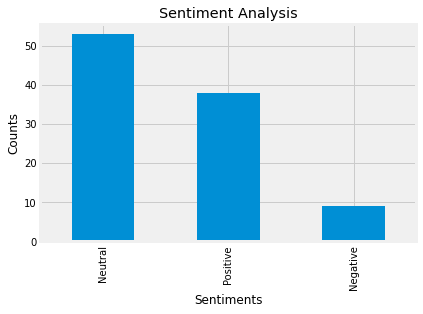

In [ ]:
#plot and visualize the sentiment count
plt.title('Sentiment Analysis')
df['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.show()

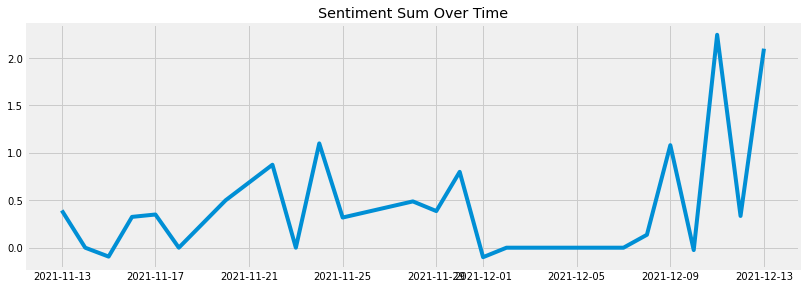

In [ ]:
#Plot the sum of the polarity for each date
plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Sum Over Time')
polarity = df.groupby(['date']).sum()['Polarity']
plt.plot(polarity.index,polarity)

In [ ]:
#show the sum of the polarity for each date
polarity

date
2021-11-13    0.392857
2021-11-14    0.000000
2021-11-15   -0.093750
2021-11-16    0.325000
2021-11-17    0.350000
2021-11-18    0.000000
2021-11-20    0.500000
2021-11-22    0.875000
2021-11-23    0.000000
2021-11-24    1.100000
2021-11-25    0.318182
2021-11-28    0.488312
2021-11-29    0.386364
2021-11-30    0.800000
2021-12-01   -0.100000
2021-12-02    0.000000
2021-12-03    0.000000
2021-12-06    0.000000
2021-12-07    0.000000
2021-12-08    0.136364
2021-12-09    1.081349
2021-12-10   -0.025000
2021-12-11    2.245238
2021-12-12    0.334848
2021-12-13    2.098990
Name: Polarity, dtype: float64

In [ ]:
# get the count articles per date
polarity_count = df.groupby(['date']).count()['Polarity']

#show data
polarity_count

date
2021-11-13     1
2021-11-14     1
2021-11-15     2
2021-11-16     3
2021-11-17     1
2021-11-18     3
2021-11-20     2
2021-11-22     3
2021-11-23     1
2021-11-24     2
2021-11-25     2
2021-11-28     3
2021-11-29     4
2021-11-30     2
2021-12-01     2
2021-12-02     1
2021-12-03     1
2021-12-06     1
2021-12-07     1
2021-12-08     2
2021-12-09     6
2021-12-10     6
2021-12-11     7
2021-12-12     6
2021-12-13    37
Name: Polarity, dtype: int64

In [ ]:
# Show the average sentiment for each day

polarity_average = polarity/polarity_count

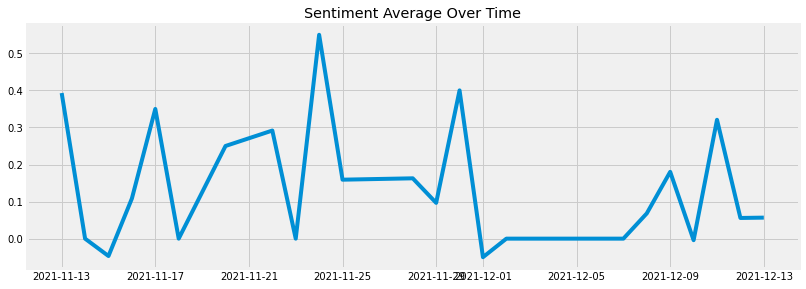

In [ ]:
#plot the average sentiment over time

plt.figure(figsize=(12.33,4.5))
plt.title('Sentiment Average Over Time')
plt.plot(polarity_average.index, polarity_average)